In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

In [2]:
df = pd.read_csv("C:\\Users\\ASUS\\DM\\cereal.csv") 
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
df.head(40)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,Apple Jacks,K,C,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,Basic 4,G,C,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,Bran Chex,R,C,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,Bran Flakes,P,C,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


In [4]:
df.loc[(df["carbo"]<0)|(df["sugars"]<0)|(df["potass"]<0)]=df.loc[(df["carbo"]<0)|(df["sugars"]<0)|(df["potass"]<0)].replace(-1,0)

# Tính các giá trị cơ bản

In [5]:
#Tính mean
col=df.columns.tolist()[3:]
mean_df = df[col].sum() / len(df)
#print(mean_df)

y = df.columns
def calculate_median(data):
    new_list = sorted(data)
    if len(new_list)%2:
      return new_list[len(new_list)//2]
    else:
      return (new_list[(len(new_list)/2)] + new_list[(len(new_list)/2)-1]) /2.0

#Tính median
median_df = []
col=df.columns.tolist()[3:]
for i in df.columns.tolist()[3:] : 
    median_df.append(calculate_median(df[i]))
#print(median_df)


#Tính phương sai
col=df.columns.tolist()[3:]
variance_df = []
for i in df.columns.tolist()[3:] : 
    variance_df.append(((df[i]-mean_df[i])**2).sum(axis=0) / (len(df)-1))
#print(variance_df)


#TÍnh độ lệch chuẩn
std_df = np.sqrt(variance_df)
#print(std_df)


#describe = ['mean' , 'std' , 'min' , 'max' , 'medium', 'variance' , 'std' , 'corr']
describe_df = pd.DataFrame({'mean' : mean_df ,'median' : median_df, 'variance': variance_df , 'std' : std_df  })
print(describe_df)

                mean      median     variance        std
calories  106.883117  110.000000   379.630895  19.484119
protein     2.545455    3.000000     1.198565   1.094790
fat         1.012987    1.000000     1.012987   1.006473
sodium    159.675325  180.000000  7027.853725  83.832295
fiber       2.151948    2.000000     5.680424   2.383364
carbo      14.610390   14.000000    17.911996   4.232257
sugars      6.935065    7.000000    19.561517   4.422840
potass     96.103896   90.000000  5076.725906  71.251147
vitamins   28.246753   25.000000   499.188312  22.342523
shelf       2.207792    2.000000     0.693096   0.832524
weight      1.029610    1.000000     0.022643   0.150477
cups        0.821039    0.750000     0.054157   0.232716
rating     42.665705   40.400208   197.326321  14.047289


# Tính tương quan

In [6]:
def vitri(a,b):
    for i in range(len(a)):
        if b==a[i] :
            vitrii=i
    return vitrii


#Tinh r tương quan
col=df.columns.tolist()[3:]
r = []
for i in col:
    cov = []*len(col)
    for j in col:
        cov.append(((df[i] - mean_df[i])*(df[j] - mean_df[j])).sum(axis=0)/(len(df) - 1))
    tam = vitri(col,i)
    for k in range(len(col)):
        r.append(round(cov[k]/(std_df[tam]*std_df[k]),1))
r_df = [[]]
for i in range(len(col)):
    r_df[0].append(r[0:13])
    del r[0:13]
df_r1 = pd.DataFrame({'name' : col , 'calories' : r_df[0][0] ,'protein' : r_df[0][1] , 'fat' : r_df[0][2] ,'sodium' : r_df[0][3] ,'fiber' : r_df[0][4] ,'carbo' : r_df[0][5] , 'sugars' : r_df[0][6] ,'potass' : r_df[0][7] , 'vitamins' : r_df[0][8] ,'shelf' : r_df[0][9] , 'weight' : r_df[0][10] ,'cups' : r_df[0][11] ,'rating': r_df[0][12] }) 
  
## Tương quan
# sns.set(context='poster', style='dark', rc={'figure.facecolor':'white'}, font_scale=1.2)
# plt.style.use('seaborn-notebook')
# corr = df.corr()
# fig, ax = plt.subplots()
# fig.set_size_inches(11, 7)
# sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)
df_r1.head(13)

,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,calories,1.0,0.0,0.5,0.3,-0.3,0.3,0.6,-0.1,0.3,0.1,0.7,0.1,-0.7
1,protein,0.0,1.0,0.2,-0.1,0.5,-0.1,-0.3,0.5,0.0,0.1,0.2,-0.2,0.5
2,fat,0.5,0.2,1.0,-0.0,0.0,-0.3,0.3,0.2,-0.0,0.3,0.2,-0.2,-0.4
3,sodium,0.3,-0.1,-0.0,1.0,-0.1,0.4,0.1,-0.0,0.4,-0.1,0.3,0.1,-0.4
4,fiber,-0.3,0.5,0.0,-0.1,1.0,-0.4,-0.1,0.9,-0.0,0.3,0.2,-0.5,0.6
5,carbo,0.3,-0.1,-0.3,0.4,-0.4,1.0,-0.4,-0.4,0.3,-0.1,0.1,0.4,0.1
6,sugars,0.6,-0.3,0.3,0.1,-0.1,-0.4,1.0,0.0,0.1,0.1,0.5,-0.0,-0.8
7,potass,-0.1,0.5,0.2,-0.0,0.9,-0.4,0.0,1.0,0.0,0.4,0.4,-0.5,0.4
8,vitamins,0.3,0.0,-0.0,0.4,-0.0,0.3,0.1,0.0,1.0,0.3,0.3,0.1,-0.2
9,shelf,0.1,0.1,0.3,-0.1,0.3,-0.1,0.1,0.4,0.3,1.0,0.2,-0.3,0.0


# Nomarliztion

In [7]:
col=df.columns.tolist()[3:]
for i in col :
    df[i]=(df[i] - df[i].mean()) / df[i].std()
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,-1.892984,1.328607,-0.012903,-0.353984,3.292847,-2.270748,-0.211417,2.580956,-0.145317,0.951573,-0.196777,-2.110034,1.832188
1,100% Natural Bran,Q,C,0.673209,0.415190,3.961373,-1.725771,-0.063754,-1.561907,0.240781,0.545901,-1.264260,0.951573,-0.196777,0.769010,-0.618057
2,All-Bran,K,C,-1.892984,1.328607,-0.012903,1.196731,2.873272,-1.798187,-0.437516,3.142351,-0.145317,0.951573,-0.196777,-2.110034,1.193099
3,All-Bran with Extra Fiber,K,C,-2.919461,1.328607,-1.006473,-0.234699,4.971147,-1.561907,-1.568012,3.282700,-0.145317,0.951573,-0.196777,-1.379530,3.633385
4,Almond Delight,R,C,0.159970,-0.498228,0.980666,0.481016,-0.483329,-0.144223,0.240781,-1.348805,-0.145317,0.951573,-0.196777,-0.305260,-0.589499


# Clustering

In [8]:
df['label'] = df['name']+'('+ df['shelf'].astype(str) + " - " + round(df['rating'],2).astype(str)+')'
df.drop(['name','shelf','rating','mfr','type'], axis=1, inplace=True)

In [9]:
X = df.drop(columns = 'label')
Y = df['label']

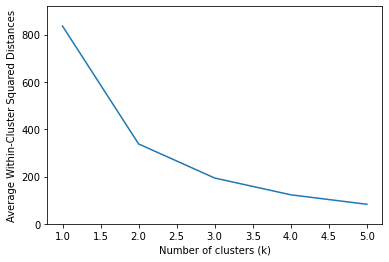

In [10]:
from sklearn.cluster import KMeans
inertia = []
for n_clusters in range(1, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(X)
    inertia.append(kmeans.inertia_ / n_clusters)
d = {'n_clusters' : range(1, 6), 'inertia': inertia}
inertias = pd.DataFrame(data = d)
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [11]:
#Euclidian Distance between two d-dimensional points
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)

In [12]:
#K-Means Algorithm
def kmeans(k,datapoints):
    # d - Dimensionality of Datapoints
    d = len(datapoints[0]) 

    #Limit our iterations
    Max_Iterations = 1000
    i = 0

    cluster = [0] * len(datapoints)
    prev_cluster = [-1] * len(datapoints)

    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []

        cluster_centers += [random.choice(datapoints)]

        force_recalculation = False

    while (cluster != prev_cluster) or (i > Max_Iterations)  :
        prev_cluster = list(cluster)
#         force_recalculation = False
        i += 1
        #Update Point's Cluster Alligiance
        for p in range(0,len(datapoints)):
            min_dist = float("inf")
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):
                dist = eucldist(datapoints[p],cluster_centers[c])
                if (dist < min_dist):
                    min_dist = dist
                    cluster[p] = c   # Reassign Point to new Cluster


        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(datapoints)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += datapoints[p][j]
                    members += 1
            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 

        #This means that our initial random assignment was poorly chosen
        #Change it to a new datapoint to actually force k clusters
                else:
                    new_center = random.choice(datapoints)
                    force_recalculation = True
                    print ("Forced Recalculation...")
            cluster_centers[k] = new_center
    print ("________________________________________________________________________________________________________")
    print ("Clusters", cluster_centers)
    print ("Iterations",i)
    print ("Predict", cluster)
    return cluster

In [13]:
features = [f for f in df if f not in 'label' ]
X=df[features]
Y=df['label']
X1=X.values.tolist()
k=3
a = kmeans(k,X1)

________________________________________________________________________________________________________
Clusters [[0.3376299210263065, -0.23474188295780546, 0.2737029667423257, 0.27570683585534106, -0.21705986792733778, -0.003363634484603236, 0.3668745006605425, -0.15179312989010108, -0.1668353462518836, 0.14188997166660516, 0.07321349585666297], [-1.0826069753213745, 0.607488123887941, -0.6927139073346835, -0.9378568589969329, 0.6362742003919745, -0.2561455800685079, -0.9611141257066952, 0.4166329800480176, -0.5575592264582914, -0.6060026338827946, -0.3866785091079586], [0.5021294396230266, 0.11071725998916916, -0.17849833854032596, 0.5804208094106643, -0.1336827792043235, 0.8402791690835025, -0.13605094098683512, -0.003797311104513146, 3.2115105513009135, 0.6892952528516217, 0.58996498141744]]
Iterations 7
Predict [1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 1, 1,

In [14]:
df['label_test'] = a

In [15]:
df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label,label_test
0,-1.892984,1.328607,-0.012903,-0.353984,3.292847,-2.270748,-0.211417,2.580956,-0.145317,-0.196777,-2.110034,100% Bran(0.9515734043958365 - 1.83),1
1,0.673209,0.415190,3.961373,-1.725771,-0.063754,-1.561907,0.240781,0.545901,-1.264260,-0.196777,0.769010,100% Natural Bran(0.9515734043958365 - -0.62),0
2,-1.892984,1.328607,-0.012903,1.196731,2.873272,-1.798187,-0.437516,3.142351,-0.145317,-0.196777,-2.110034,All-Bran(0.9515734043958365 - 1.19),1
3,-2.919461,1.328607,-1.006473,-0.234699,4.971147,-1.561907,-1.568012,3.282700,-0.145317,-0.196777,-1.379530,All-Bran with Extra Fiber(0.9515734043958365 -...,1
4,0.159970,-0.498228,0.980666,0.481016,-0.483329,-0.144223,0.240781,-1.348805,-0.145317,-0.196777,-0.305260,Almond Delight(0.9515734043958365 - -0.59),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.159970,-0.498228,-0.012903,1.077445,-0.902904,1.509741,-0.889714,-0.506713,-0.145317,-0.196777,-0.305260,Triples(0.9515734043958365 - -0.25),0
73,0.159970,-1.411645,-0.012903,-0.234699,-0.902904,-0.380504,1.145177,-0.997933,-0.145317,-0.196777,0.769010,Trix(-0.24959302410382608 - -1.06),0
74,-0.353268,0.415190,-0.012903,0.838873,0.355821,0.564619,-0.889714,0.265204,-0.145317,-0.196777,-0.649027,Wheat Chex(-1.4507594526034886 - 0.51),0
75,-0.353268,0.415190,-0.012903,0.481016,0.355821,0.564619,-0.889714,0.195030,-0.145317,-0.196777,0.769010,Wheaties(-1.4507594526034886 - 0.64),0


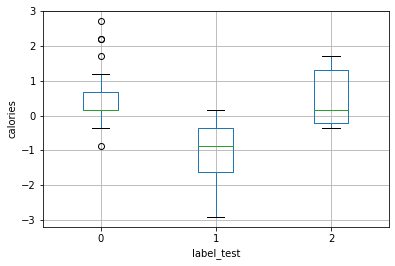

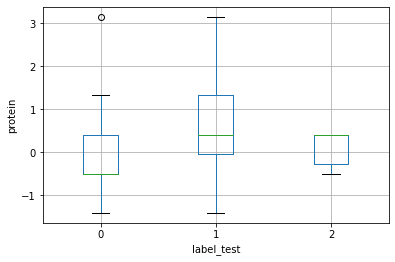

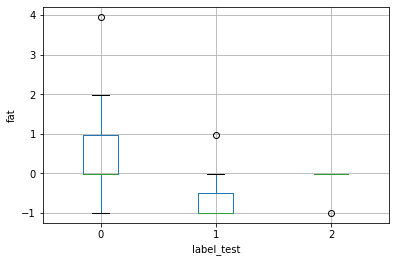

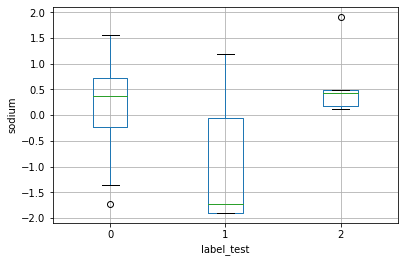

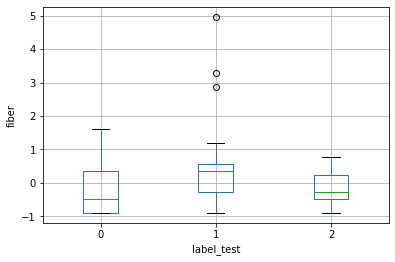

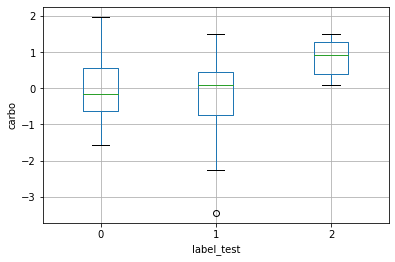

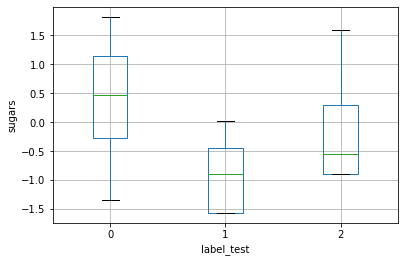

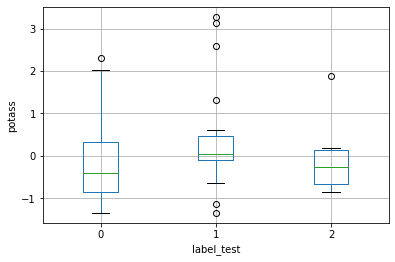

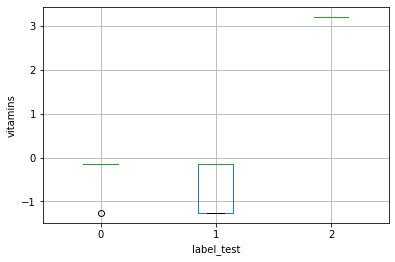

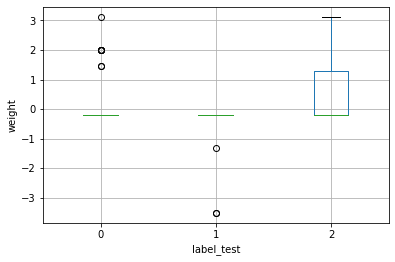

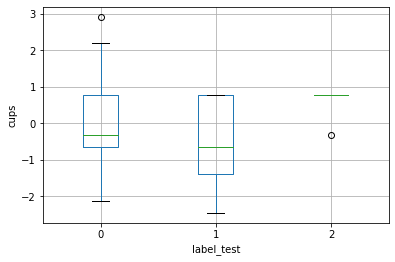

In [16]:
col= df.columns.tolist()[:-2]
for i in range(0 , len(col)) :
    ax = df.boxplot(column= col[i], by='label_test')
    ax.set_ylabel(col[i])
    plt.suptitle('') # Suppress the titles
    plt.title('')
#     plt.savefig(col[i]+'.png')

C:\Users\ASUS\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


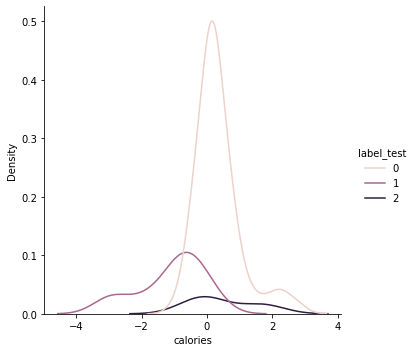

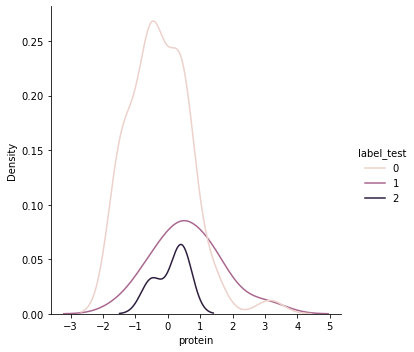

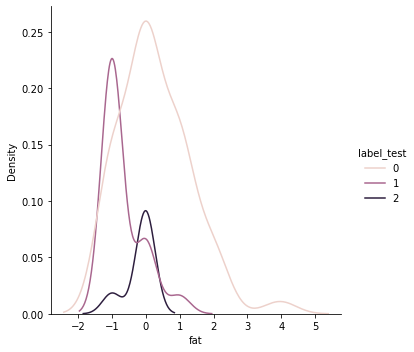

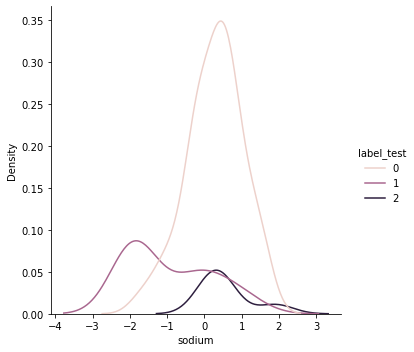

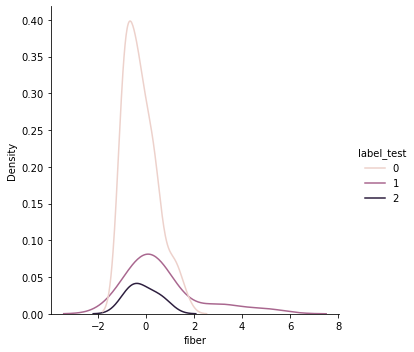

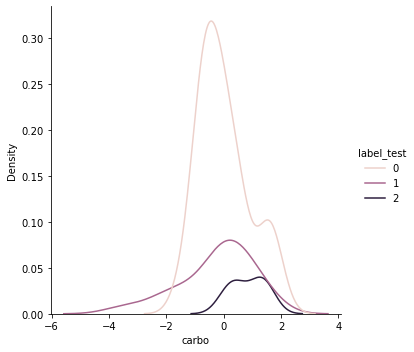

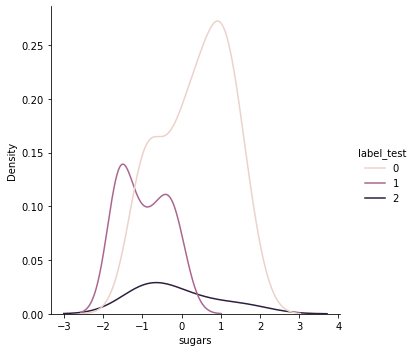

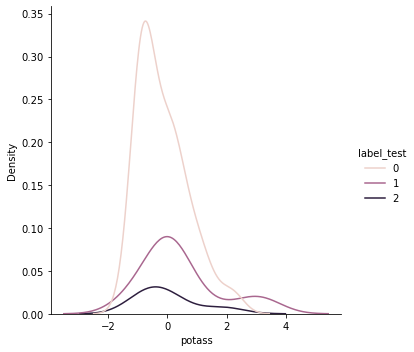

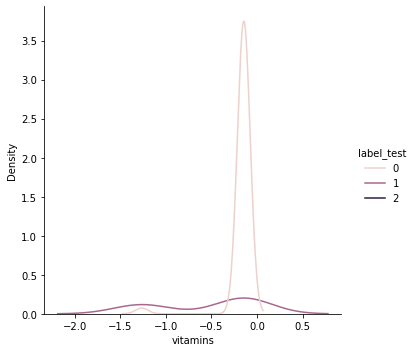

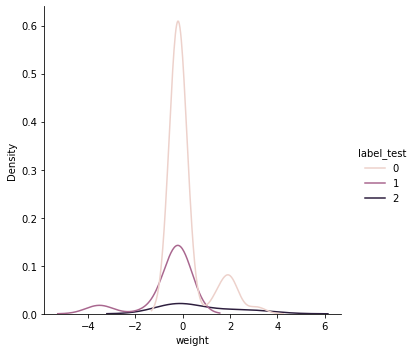

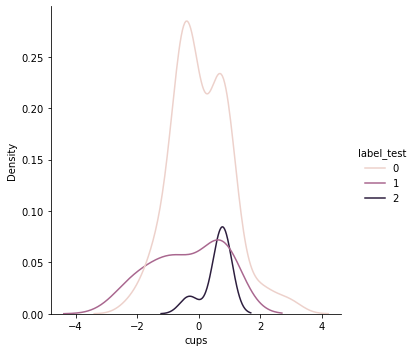

In [17]:
for i in col :
    a = sns.displot(df, x=i ,hue='label_test', kind="kde")